# Asteroid Science : A study of Asteroid Features
#### Hrushikesh Akhade&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;           Paritosh Sabade&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;                     Deepak Bhadoria

### Import Libraries and read dataset

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set_theme()
import matplotlib.pyplot as plt

In [35]:
path = "Asteroid_Updated.csv"
df_asteroid = pd.read_csv(path,low_memory=False)

Above dataset is imported from Kaggle and consists of records about the asteroids with physical 
and basic attributes. Dataset is maintained by Jet Propulsion Laboratory of California Institute of Technology ,an organization under NASA
https://www.kaggle.com/datasets/basu369victor/prediction-of-asteroid-diameter?select=Asteroid_Updated.csv

### Exploratory Data analysis

In [36]:
df_asteroid.shape

(839736, 27)

Shape of the data : There are total 8839736 rows and 27 columns.  

Important columnn names and their description  

a->semi-major axis(au)                  
e->eccentricity                         
i->Inclination with respect to x-y ecliptic plane(deg)    
om->Longitude of the ascending node       
w-> argument of perihelion           
q-> perihelion distance(au)         
ad-> aphelion distance(au)           
per_y->Orbital period(YEARS)             
data_arc->data arc-span(d)            
neo-> Near Earth Object  
pha -> Physically Hazardous Asteroid  
diameter->Diameter of asteroid(Km)                 

In [37]:
df_asteroid.describe()

,a,e,G,i,om,w,q,ad,per_y,data_arc,n_obs_used,H,albedo,rot_per,GM,BV,UB,IR,moid
count,839734.000000,839736.000000,119.000000,839736.000000,839736.000000,839736.000000,839736.000000,839730.000000,839735.000000,823947.000000,839736.000000,837042.000000,136452.000000,18796.000000,1.400000e+01,1021.000000,979.000000,1.00,8.228140e+05
mean,2.843217,0.155633,0.178739,8.950009,168.501641,181.076593,2.404732,3.385707,6.859544,5660.187025,254.617708,16.786069,0.130052,21.136772,7.821928e+00,0.769212,0.364396,-0.33,1.423511e+00
std,37.327031,0.093888,0.134603,6.666273,103.096571,104.024110,2.233138,12.746419,252.172503,4192.420393,363.004548,1.821274,0.109983,73.131751,1.678880e+01,0.088625,0.095780,NaN,2.251048e+00
min,-32588.942986,0.000000,-0.250000,0.007546,0.000388,0.001666,0.070511,0.773684,0.000000,0.000000,2.000000,-1.100000,0.001000,0.004389,2.100000e-09,0.580000,0.120000,-0.33,3.437640e-07
25%,2.385244,0.091453,0.100000,4.069043,80.212344,91.039551,1.971939,2.775342,3.683896,3599.000000,50.000000,15.900000,0.053000,4.210000,1.022225e-03,0.700000,0.289000,-0.33,9.785395e-01
50%,2.644219,0.143654,0.190000,7.257311,160.296065,181.669812,2.225494,3.037745,4.299860,5792.000000,118.000000,16.800000,0.078000,6.653000,6.192500e-01,0.743000,0.360000,-0.33,1.237880e+00
75%,2.996035,0.199400,0.250000,12.256026,252.206645,271.523344,2.578162,3.357958,5.185951,7228.000000,292.000000,17.600000,0.188000,12.624250,6.500000e+00,0.850000,0.439000,-0.33,1.590610e+00
max,3043.149073,1.201134,0.600000,175.188725,359.999800,359.999833,80.424175,6081.841956,167877.712688,72684.000000,9325.000000,33.200000,1.000000,3240.000000,6.262840e+01,1.077000,0.655000,-0.33,7.950130e+01


Describe function returns the basic statistical details like percentile ,count, mean , standard deviation , minimum , maximum values for each column

In [38]:
df_asteroid.head()

,full_name,a,e,G,i,om,w,q,ad,per_y,...,rot_per,GM,BV,UB,IR,spec_B,spec_T,neo,pha,moid
0,1 Ceres,2.769165,0.076009,0.12,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,...,9.074170,62.6284,0.713,0.426,NaN,C,G,N,N,1.59478
1,2 Pallas,2.772466,0.230337,0.11,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,...,7.813200,14.3000,0.635,0.284,NaN,B,B,N,N,1.23324
2,3 Juno,2.669150,0.256942,0.32,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,...,7.210000,NaN,0.824,0.433,NaN,Sk,S,N,N,1.03454
3,4 Vesta,2.361418,0.088721,0.32,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,...,5.342128,17.8000,0.782,0.492,NaN,V,V,N,N,1.13948
4,5 Astraea,2.574249,0.191095,NaN,5.366988,141.576604,358.687608,2.082324,3.066174,4.130323,...,16.806000,NaN,0.826,0.411,NaN,S,S,N,N,1.09589


Head function returns the first 5 rows of the asteroid dataset. As you can observe , IR column (Color index I-R magnitude difference) has 5 NaN values and G(Magnitude slope parameter) column has 1 NaN value.

In [39]:
df_asteroid.tail()

,full_name,a,e,G,i,om,w,q,ad,per_y,...,rot_per,GM,BV,UB,IR,spec_B,spec_T,neo,pha,moid
839731,(6344 P-L),2.812945,0.664688,NaN,4.695700,183.310012,234.618352,0.943214,4.682676,4.717914,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Y,0.032397
839732,(1168 T-2),2.645238,0.259376,NaN,12.574937,1.620020,339.568072,1.959126,3.331350,4.302346,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,0.956145
839733,(2060 T-2),2.373137,0.202053,NaN,0.732484,176.499082,198.026527,1.893638,2.852636,3.655884,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,0.893896
839734,(2678 T-3),2.260404,0.258348,NaN,9.661947,204.512448,148.496988,1.676433,2.844376,3.398501,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,0.680220
839735,(4571 T-3),2.546442,0.287672,NaN,5.356238,70.709555,273.483265,1.813901,3.278983,4.063580,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,0.815280


Tail function return the last 5 rows of the asteroid dataset. As you can see , last 5 columns have 5 NaN values in its name column , UB(Color index U-B magnitude difference), IR(Color index I-R magnitude difference) , spec_B(Spectral taxonomic type(SMASSII)) , spec_T(Spectral taxonomic type(Tholen)) , G(Magnitude slope parameter) column.

In [40]:
df_asteroid.isnull().sum()

full_name              0
a                      2
e                      0
G                 839617
i                      0
om                     0
w                      0
q                      0
ad                     6
per_y                  1
data_arc           15789
condition_code       993
n_obs_used             0
H                   2694
diameter          702055
extent            839718
albedo            703284
rot_per           820940
GM                839722
BV                838715
UB                838757
IR                839735
spec_B            838070
spec_T            838756
neo                    6
pha                16922
moid               16922
dtype: int64

Above data shows the number of nulls values in each column out of 839714 values . Out of 31 columns , around 12 columns contain more tha 90% null values.

In [41]:
df_asteroid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839736 entries, 0 to 839735
Data columns (total 27 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   full_name       839736 non-null  object 
 1   a               839734 non-null  float64
 2   e               839736 non-null  float64
 3   G               119 non-null     float64
 4   i               839736 non-null  float64
 5   om              839736 non-null  float64
 6   w               839736 non-null  float64
 7   q               839736 non-null  float64
 8   ad              839730 non-null  float64
 9   per_y           839735 non-null  float64
 10  data_arc        823947 non-null  float64
 11  condition_code  838743 non-null  object 
 12  n_obs_used      839736 non-null  int64  
 13  H               837042 non-null  float64
 14  diameter        137681 non-null  object 
 15  extent          18 non-null      object 
 16  albedo          136452 non-null  float64
 17  rot_per   

Distribution in missing values across columns : Info method returns the number of non-null values in each column along with the data type of each of the column values. As you can see , there are 21 columns with float values ,1 column with int value and 9 columns with object data type.

### Handling the missing values 

In [42]:
df_null = pd.DataFrame(np.round(100*df_asteroid.isnull().sum()/df_asteroid.shape[0],4))
df_null

,0
full_name,0.0000
a,0.0002
e,0.0000
G,99.9858
i,0.0000
om,0.0000
w,0.0000
q,0.0000
ad,0.0007
per_y,0.0001


Created a dataframe for null values by dividing each column with number of null values in that column by total number of rows in the dataset.

#### Changing th datatype of diameter column from object to numeric

In [43]:
df_asteroid['diameter'] = df_asteroid['diameter'].astype(float, errors = 'raise')
df_asteroid['diameter'] 

0         939.400
1         545.000
2         246.596
3         525.400
4         106.699
           ...   
839731        NaN
839732        NaN
839733        NaN
839734        NaN
839735        NaN
Name: diameter, Length: 839736, dtype: float64

#### Dropping rows with diameter value null

In [44]:
df_asteroid = df_asteroid.dropna(subset=['diameter'])
df_asteroid.isna().sum()

full_name              0
a                      0
e                      0
G                 137562
i                      0
om                     0
w                      0
q                      0
ad                     0
per_y                  0
data_arc             140
condition_code         0
n_obs_used             0
H                    751
diameter               0
extent            137665
albedo              1232
rot_per           126493
GM                137667
BV                136676
UB                136716
IR                137680
spec_B            136311
spec_T            136716
neo                    0
pha                    0
moid                   0
dtype: int64

#### Dropping all other rows that consists more than 50%  missing values

In [45]:
perc = 0.5
drop_columns= df_asteroid.isna().sum()/df_asteroid.shape[0] > perc
df_asteroid = df_asteroid.drop(df_asteroid.columns[drop_columns > perc], axis=1)


In [46]:
df_asteroid.isna().sum()




full_name            0
a                    0
e                    0
i                    0
om                   0
w                    0
q                    0
ad                   0
per_y                0
data_arc           140
condition_code       0
n_obs_used           0
H                  751
diameter             0
albedo            1232
neo                  0
pha                  0
moid                 0
dtype: int64

In [47]:
df_asteroid

,full_name,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,diameter,albedo,neo,pha,moid
0,1 Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0,1002,3.34,939.400,0.0900,N,N,1.59478
1,2 Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,0,8490,4.13,545.000,0.1010,N,N,1.23324
2,3 Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,0,7104,5.33,246.596,0.2140,N,N,1.03454
3,4 Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,0,9325,3.20,525.400,0.4228,N,N,1.13948
4,5 Astraea,2.574249,0.191095,5.366988,141.576604,358.687608,2.082324,3.066174,4.130323,63431.0,0,2861,6.85,106.699,0.2740,N,N,1.09589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797896,(2016 NB7),3.171225,0.159119,27.098625,309.036573,19.746812,2.666623,3.675826,5.647402,2373.0,1,50,16.20,3.793,0.0210,N,N,1.66301
798113,(2016 NW24),2.548410,0.076071,11.593237,246.298656,170.090810,2.354549,2.742270,4.068291,3297.0,2,33,17.30,2.696,0.0610,N,N,1.36733
798225,(2016 NR35),3.146246,0.220559,17.966646,137.981403,180.898833,2.452313,3.840180,5.580811,2839.0,1,47,16.80,2.917,NaN,N,N,1.43837
799788,(2016 PB66),3.051336,0.287449,14.456779,343.917822,342.614839,2.174231,3.928440,5.330196,2208.0,2,27,17.20,3.271,0.0720,N,N,1.16684


####  Filling null values

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


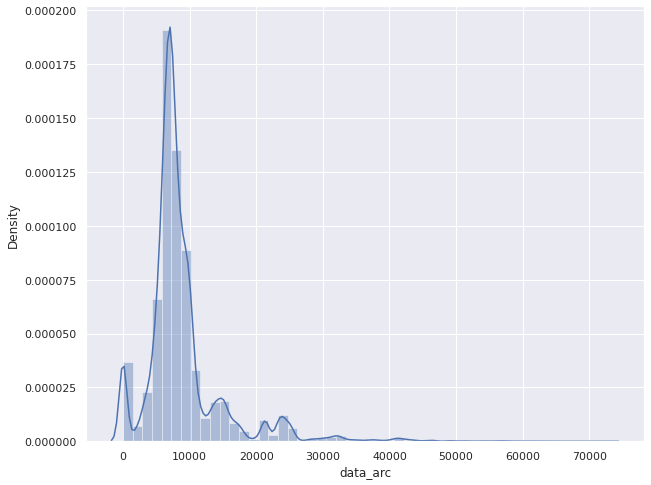

In [48]:
temp_nonnull = df_asteroid.fillna(0)
fig, ax = plt.subplots(figsize=(10,8))
sns.distplot(temp_nonnull.data_arc)

As we can see from the distribution of data_arc column, it is skewed towards left. The density peaks near the median of the data. Therefore, replacing missing values with median is a better approach.

In [49]:
df_asteroid['data_arc'].median()

7492.0

In [50]:
df_asteroid.data_arc = df_asteroid.data_arc.fillna(df_asteroid.data_arc.median())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


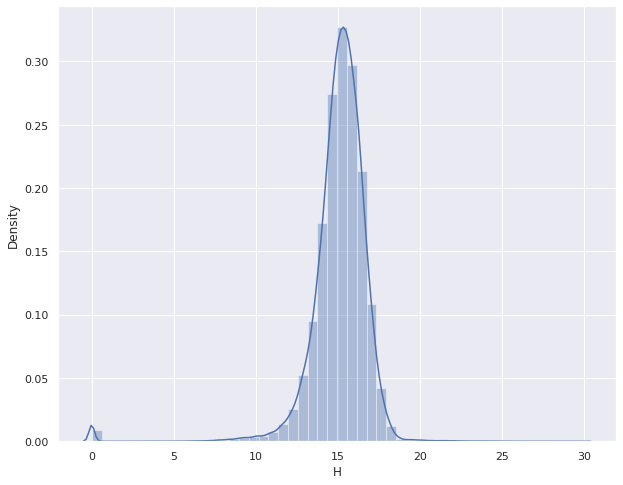

In [51]:
fig, ax = plt.subplots(figsize=(10,8))
sns.distplot(temp_nonnull.H)

As we can see from the distribution of H, it is similar to normal distribution. Therefore, replacing missing values with mean is a better approach.

In [52]:
df_asteroid.H = df_asteroid.H.fillna(df_asteroid.H.mean())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


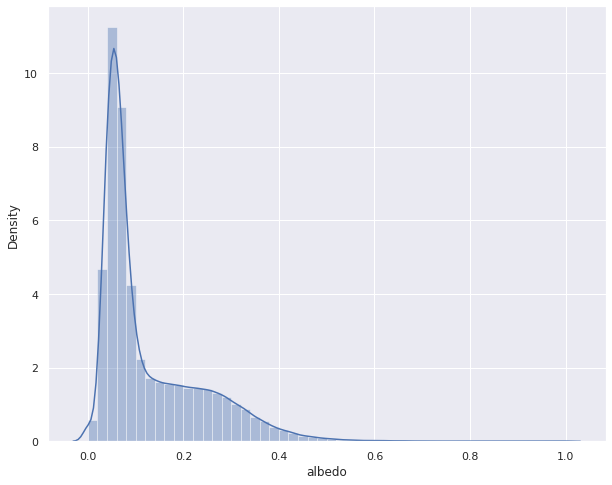

In [53]:
fig, ax = plt.subplots(figsize=(10,8))
sns.distplot(temp_nonnull.albedo)

As we can see from the distribution of albedo column, it is skewed towards left. Therefore, replacing missing values with mean is a better approach.

In [54]:
print(df_asteroid.albedo.median())
print(df_asteroid.albedo.mean())

0.078
0.13004983107241835


In [55]:
df_asteroid.albedo = df_asteroid.albedo.fillna(df_asteroid.albedo.mean())

In [56]:
df_asteroid.isna().sum()


full_name         0
a                 0
e                 0
i                 0
om                0
w                 0
q                 0
ad                0
per_y             0
data_arc          0
condition_code    0
n_obs_used        0
H                 0
diameter          0
albedo            0
neo               0
pha               0
moid              0
dtype: int64

In [57]:
#df_asteroid['diameter'] = df_asteroid['diameter'].apply(np.log)
target = df_asteroid['diameter']
predictors = df_asteroid.drop('diameter',axis=1) 
df_asteroid = predictors

#### Doing One hot encoding on categorical data

In [58]:
data_cat = df_asteroid[['condition_code', 'neo', 'pha']]
data_cat = pd.get_dummies(data_cat)

In [59]:
data_cat

,condition_code_0,condition_code_1,condition_code_2,condition_code_3,condition_code_4,condition_code_5,condition_code_6,condition_code_7,condition_code_8,condition_code_9,neo_N,neo_Y,pha_N,pha_Y
0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
1,1,0,0,0,0,0,0,0,0,0,1,0,1,0
2,1,0,0,0,0,0,0,0,0,0,1,0,1,0
3,1,0,0,0,0,0,0,0,0,0,1,0,1,0
4,1,0,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797896,0,1,0,0,0,0,0,0,0,0,1,0,1,0
798113,0,0,1,0,0,0,0,0,0,0,1,0,1,0
798225,0,1,0,0,0,0,0,0,0,0,1,0,1,0
799788,0,0,1,0,0,0,0,0,0,0,1,0,1,0


In [60]:
df_asteroid.isnull().sum()
df_asteroid = df_asteroid.drop(['condition_code', 'neo', 'pha'],axis=1)


#### Dropping name attribute

In [61]:
df_asteroid = df_asteroid.drop(['full_name'],axis =1)

In [62]:
df_asteroid

,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,H,albedo,moid
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,1002,3.34,0.09000,1.59478
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,8490,4.13,0.10100,1.23324
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,7104,5.33,0.21400,1.03454
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,9325,3.20,0.42280,1.13948
4,2.574249,0.191095,5.366988,141.576604,358.687608,2.082324,3.066174,4.130323,63431.0,2861,6.85,0.27400,1.09589
...,...,...,...,...,...,...,...,...,...,...,...,...,...
797896,3.171225,0.159119,27.098625,309.036573,19.746812,2.666623,3.675826,5.647402,2373.0,50,16.20,0.02100,1.66301
798113,2.548410,0.076071,11.593237,246.298656,170.090810,2.354549,2.742270,4.068291,3297.0,33,17.30,0.06100,1.36733
798225,3.146246,0.220559,17.966646,137.981403,180.898833,2.452313,3.840180,5.580811,2839.0,47,16.80,0.13005,1.43837
799788,3.051336,0.287449,14.456779,343.917822,342.614839,2.174231,3.928440,5.330196,2208.0,27,17.20,0.07200,1.16684


#### Correleation matrix

In [63]:
print(df_asteroid.corr())

                   a         e         i        om         w         q  \
a           1.000000  0.021349  0.148600 -0.000679 -0.002366  0.366565   
e           0.021349  1.000000  0.144748 -0.000493  0.012397 -0.514894   
i           0.148600  0.144748  1.000000 -0.012915 -0.004343  0.085796   
om         -0.000679 -0.000493 -0.012915  1.000000 -0.107066 -0.002938   
w          -0.002366  0.012397 -0.004343 -0.107066  1.000000 -0.006660   
q           0.366565 -0.514894  0.085796 -0.002938 -0.006660  1.000000   
ad          0.986156  0.114217  0.140959 -0.000190 -0.001301  0.207210   
per_y       0.941350  0.048270  0.096266  0.000366 -0.001619  0.109321   
data_arc   -0.019174 -0.026880 -0.198490  0.000260 -0.005498 -0.017085   
n_obs_used -0.049290 -0.075154 -0.226596 -0.024717  0.010440 -0.080790   
H          -0.132633  0.198556 -0.033650  0.002837 -0.008494 -0.374457   
albedo     -0.110137 -0.019210 -0.089133  0.000739 -0.002990 -0.261607   
moid        0.369849 -0.490844  0.1250

#### Correlation matrix heatmap of preprocessed data

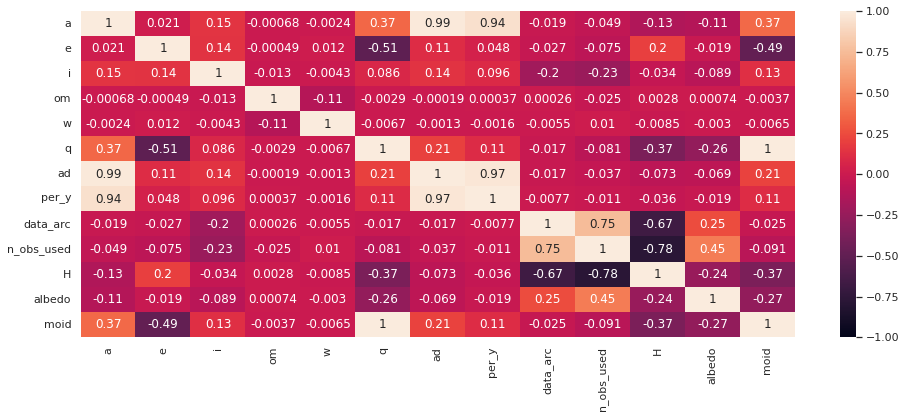

In [64]:
plt.figure(figsize=(16, 6))
dataplot = sns.heatmap(df_asteroid.corr(),annot=True,vmin=-1, vmax=1)

As you can observe from the correlation matrix above,  there are multiple attributes which are postively correlated and negatively correlated. There are many attributes with almost zero correlation value. 

#### Changing to log scale

If the data values are too big then after normalization, the become exponentially small which can given NaN value problem. To avoid this we change scale to log.

In [65]:
df_asteroid.head()

,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,H,albedo,moid
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,1002,3.34,0.0900,1.59478
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,8490,4.13,0.1010,1.23324
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,7104,5.33,0.2140,1.03454
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,9325,3.20,0.4228,1.13948
4,2.574249,0.191095,5.366988,141.576604,358.687608,2.082324,3.066174,4.130323,63431.0,2861,6.85,0.2740,1.09589


In [66]:
for column in df_asteroid.columns:
    df_asteroid['log('+column+')'] = df_asteroid[column].apply(np.log)
    df_asteroid = df_asteroid.drop([column],axis=1)


In [67]:
df_asteroid

,log(a),log(e),log(i),log(om),log(w),log(q),log(ad),log(per_y),log(data_arc),log(n_obs_used),log(H),log(albedo),log(moid)
0,1.018546,-2.576903,2.360294,4.385839,4.298614,0.939493,1.091805,1.527838,9.085004,6.909753,1.205971,-2.407946,0.466736
1,1.019737,-1.468213,3.550658,5.153754,5.736730,0.757935,1.227025,1.529625,11.188828,9.046644,1.418277,-2.292635,0.209645
2,0.981760,-1.358904,2.564097,5.134932,5.513988,0.684778,1.210442,1.472659,11.193877,8.868413,1.673351,-1.541779,0.033957
3,0.859262,-2.422253,1.965961,4.642570,5.015480,0.766356,0.944266,1.288912,10.097738,9.140454,1.163151,-0.860856,0.130572
4,0.945558,-1.654987,1.680267,4.952841,5.882452,0.733485,1.120430,1.418356,11.057708,7.958926,1.924249,-1.294627,0.091567
...,...,...,...,...,...,...,...,...,...,...,...,...,...
797896,1.154118,-1.838104,3.299483,5.733460,2.982992,0.980813,1.301778,1.731196,7.771910,3.912023,2.785011,-3.863233,0.508629
798113,0.935469,-2.576086,2.450422,5.506545,5.136332,0.856349,1.008786,1.403223,8.100768,3.496508,2.850707,-2.796881,0.312860
798225,1.146210,-1.511589,2.888517,4.927119,5.197938,0.897031,1.345519,1.719334,7.951207,3.850148,2.821379,-2.039838,0.363511
799788,1.115579,-1.246708,2.671163,5.840403,5.836607,0.776675,1.368242,1.673388,7.699842,3.295837,2.844909,-2.631089,0.154299


#### Normalization

In [68]:
from sklearn import preprocessing

#Input standard normalization:
std_scaler = preprocessing.StandardScaler().fit(df_asteroid)

def scaler(X):
    x_norm_arr= std_scaler.fit_transform(X)
    return pd.DataFrame(x_norm_arr, columns=X.columns, index = X.index)

In [69]:
df_asteroid_norm = scaler(df_asteroid)

In [70]:
df_asteroid_norm.head()

,log(a),log(e),log(i),log(om),log(w),log(q),log(ad),log(per_y),log(data_arc),log(n_obs_used),log(H),log(albedo),log(moid)
0,-0.002804,-0.766987,0.348919,-0.442523,-0.614557,0.413788,-0.375455,-0.002804,0.256297,0.763904,-15.335356,-0.087909,0.446106
1,0.004721,0.984931,1.891332,0.333683,0.843570,-0.495615,0.459307,0.004721,1.353118,2.518509,-13.178080,0.063489,-0.204711
2,-0.235180,1.157657,0.612996,0.314657,0.617728,-0.862048,0.356933,-0.235180,1.355750,2.372163,-10.586239,1.049335,-0.649459
3,-1.008993,-0.522614,-0.162038,-0.183020,0.112284,-0.453437,-1.286261,-1.008993,0.784282,2.595537,-15.770456,1.943362,-0.404881
4,-0.463867,0.689796,-0.532226,0.130601,0.991320,-0.618084,-0.198739,-0.463867,1.284759,1.625382,-8.036836,1.373837,-0.503621


#### Concatenating categorical dataframe to numerical dataframe

In [71]:
df_asteroid_processed = pd.concat([df_asteroid_norm,data_cat],axis = 1)

In [72]:
df_asteroid_processed

,log(a),log(e),log(i),log(om),log(w),log(q),log(ad),log(per_y),log(data_arc),log(n_obs_used),...,condition_code_4,condition_code_5,condition_code_6,condition_code_7,condition_code_8,condition_code_9,neo_N,neo_Y,pha_N,pha_Y
0,-0.002804,-0.766987,0.348919,-0.442523,-0.614557,0.413788,-0.375455,-0.002804,0.256297,0.763904,...,0,0,0,0,0,0,1,0,1,0
1,0.004721,0.984931,1.891332,0.333683,0.843570,-0.495615,0.459307,0.004721,1.353118,2.518509,...,0,0,0,0,0,0,1,0,1,0
2,-0.235180,1.157657,0.612996,0.314657,0.617728,-0.862048,0.356933,-0.235180,1.355750,2.372163,...,0,0,0,0,0,0,1,0,1,0
3,-1.008993,-0.522614,-0.162038,-0.183020,0.112284,-0.453437,-1.286261,-1.008993,0.784282,2.595537,...,0,0,0,0,0,0,1,0,1,0
4,-0.463867,0.689796,-0.532226,0.130601,0.991320,-0.618084,-0.198739,-0.463867,1.284759,1.625382,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797896,0.853600,0.400441,1.565872,0.919646,-1.948486,0.620754,0.920782,0.853600,-0.428280,-1.697538,...,0,0,0,0,0,0,1,0,1,0
798113,-0.527595,-0.765696,0.465702,0.690282,0.234818,-0.002669,-0.887958,-0.527595,-0.256831,-2.038719,...,0,0,0,0,0,0,1,0,1,0
798225,0.803647,0.916389,1.033363,0.104601,0.297281,0.201103,1.190812,0.803647,-0.334804,-1.748344,...,0,0,0,0,0,0,1,0,1,0
799788,0.610154,1.334945,0.751727,1.027744,0.944837,-0.401749,1.331090,0.610154,-0.465852,-2.203490,...,0,0,0,0,0,0,1,0,1,0


### Splitting dataframe into test and train dataframes

In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(df_asteroid_processed,target,test_size=0.20,random_state=0)

In [74]:
Y_train.head()

81030     3.641
81445     4.131
49922     5.307
206320    4.307
58129     5.697
Name: diameter, dtype: float64

#### Feature Selection

Selecting relevant features and droping other irrelevant features.

In [75]:
# Visualizing the feature importance
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression


RF = RandomForestRegressor()
RF.fit(X_train, Y_train)

importance = RF.feature_importances_
sorted_ind = np.argsort(importance)[::-1]
X_train.columns[sorted_ind]


Index(['log(H)', 'log(albedo)', 'log(n_obs_used)', 'log(per_y)', 'log(a)',
       'log(data_arc)', 'log(i)', 'log(om)', 'log(ad)', 'log(e)', 'log(w)',
       'log(q)', 'log(moid)', 'condition_code_0', 'condition_code_3',
       'condition_code_1', 'condition_code_2', 'condition_code_9',
       'condition_code_4', 'condition_code_6', 'neo_Y', 'condition_code_5',
       'condition_code_8', 'neo_N', 'condition_code_7', 'pha_Y', 'pha_N'],
      dtype='object')

**Selecting top twenty best features. This is because the relevance score drops significantly after top twenty features.**

In [76]:
top_twenty = sorted_ind[:20]

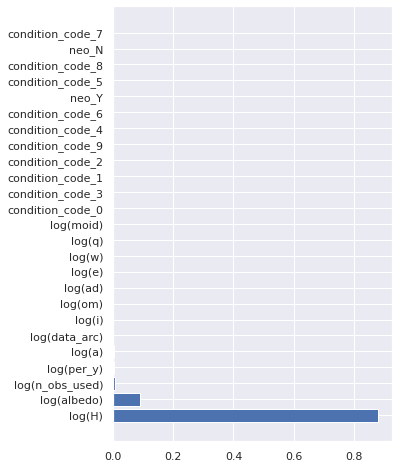

In [77]:
plt.figure(figsize=(5,8))
plt.barh(X_train.columns[sorted_ind[:25]], RF.feature_importances_[sorted_ind[:25]])
plt.show()

The above graph shows the importance of each feature. Lower the value, greater is the importance. We can see there is a jump in the value after 20th feature. This means that feature below the top twenty are very insignificant for predicting the diameter.

In [78]:
X_train = X_train[X_train.columns[top_twenty]]

In [79]:
X_train

,log(H),log(albedo),log(n_obs_used),log(per_y),log(a),log(data_arc),log(i),log(om),log(ad),log(e),log(w),log(q),log(moid),condition_code_0,condition_code_3,condition_code_1,condition_code_2,condition_code_9,condition_code_4,condition_code_6
81030,-0.005004,0.300703,0.616164,-0.022237,-0.022237,0.195637,-1.406753,-1.762533,0.115076,0.491769,0.684282,-0.130434,-0.109948,1,0,0,0,0,0,0
81445,-0.005004,0.101920,0.433430,-0.039285,-0.039285,0.721248,-1.099098,-0.832705,-0.014450,0.279720,0.424094,-0.018002,-0.009030,1,0,0,0,0,0,0
49922,-1.218650,1.614016,0.888367,-0.429850,-0.429850,0.193775,0.812828,-0.290102,-0.702574,-0.467864,0.360564,-0.011442,-0.003621,1,0,0,0,0,0,0
206320,0.390935,-0.620270,-0.178476,-0.532067,-0.532067,0.045854,0.787778,-0.035954,-0.782595,-0.408435,0.344639,-0.111946,-0.092823,1,0,0,0,0,0,0
58129,-0.005004,-0.859652,0.634594,-0.244972,-0.244972,0.491067,0.458505,0.423474,-0.132060,0.438733,0.694910,-0.273635,-0.105878,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64427,0.128697,1.813557,0.556143,-1.172962,-1.172962,0.475428,-0.149596,0.743518,-1.074873,0.371934,0.988416,-0.969240,-0.930129,1,0,0,0,0,0,0
245902,0.957337,-0.940892,-0.074339,-0.850536,-0.850536,0.175882,-0.264746,0.389681,-0.389048,0.967705,-0.295986,-1.157544,-1.097498,1,0,0,0,0,0,0
242700,0.062067,0.353866,-0.158075,0.767397,0.767397,0.147836,0.517832,-0.614386,0.493011,-0.391794,0.790596,0.912839,0.824323,1,0,0,0,0,0,0
405496,0.583265,1.299917,-0.584259,0.740802,0.740802,-0.089586,0.791149,-1.497928,1.275267,1.112753,-0.511194,-0.039874,0.131654,1,0,0,0,0,0,0


In [80]:
X_test = X_test[X_test.columns[top_twenty]]

In [81]:
X_test.head()

,log(H),log(albedo),log(n_obs_used),log(per_y),log(a),log(data_arc),log(i),log(om),log(ad),log(e),log(w),log(q),log(moid),condition_code_0,condition_code_3,condition_code_1,condition_code_2,condition_code_9,condition_code_4,condition_code_6
41995,0.194894,1.971625,0.755668,-1.086064,-1.086064,0.280432,-0.426025,0.094748,-0.738639,0.795511,0.516618,-1.193988,-1.125965,1,0,0,0,0,0,0
76652,-0.487318,0.723744,0.296373,0.718098,0.718098,0.289992,0.337823,-0.505440,0.303285,-0.863039,-1.517495,1.009651,0.894922,1,0,0,0,0,0,0
254372,0.194894,-0.664782,-0.673598,0.797619,0.797619,0.079849,1.284999,-2.052243,0.408621,-0.760291,-0.136312,1.046713,0.978878,1,0,0,0,0,0,0
171191,0.519559,-0.664782,-0.399345,-0.117408,-0.117408,0.169499,0.519336,0.482674,-0.520101,-0.889613,0.565271,0.353588,0.392477,1,0,0,0,0,0,0
95332,-0.487318,0.565162,0.596305,0.738544,0.738544,0.336342,0.289523,0.262817,0.090605,-2.139246,-0.551524,1.235231,1.050731,1,0,0,0,0,0,0


#### GridSearchCV for hyperparameter tuning

In [82]:
# Using GridSearchCV to find best hyperparameters for the different models
from sklearn.model_selection import GridSearchCV

def grid_search(model_name, params):

    model = model_name

    # Instantiate the grid search model
    grid_search_model = GridSearchCV(estimator = model, param_grid = params, cv = 3, n_jobs = -1, verbose = 2)
    grid_search_model.fit(X_train, Y_train)
    
    print('Best Scores: ',grid_search_model.best_score_)
    print('Best estimator: ',grid_search_model.best_estimator_)
    print('Best parameters: ',grid_search_model.best_params_) 
    
    return grid_search_model

#### Functions for calculating metric parameters

In [83]:

from sklearn.metrics import r2_score

def r2_score_fun(prediction):
    score = r2_score(Y_test,prediction)
    #print(score)
    return score

In [84]:
from sklearn.metrics import mean_squared_error
def MSE_fun(prediction):
    score = mean_squared_error(Y_test,prediction)
    return score

In [85]:
from sklearn.metrics import mean_absolute_error
def MAE_fun(prediction):
    score = mean_absolute_error(Y_test,prediction)
    return score

In [86]:
def plot(prediction):
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,7)) 
    sns.distplot(np.log(Y_test.values),label='test values', ax=ax1)
    sns.distplot(np.log(prediction) ,label='prediction values', ax=ax1)
    ax1.set_xlabel('Distribution plot')
    ax2.scatter(np.log(Y_test),np.log(prediction), c='red',label='prediction values')
    ax2.plot(np.log(Y_test),np.log(Y_test),c='blue',label='y=x')
    ax2.set_xlabel('test value(log)')
    ax2.set_ylabel('estimated radius(log)')
    ax1.legend()
    ax2.legend()
    ax2.axis('scaled') 


In [128]:
algorithms =[]
r2_all =[]
MSE_all =[]
MAE_all =[]


In [ ]:
X_test.head()

,log(H),log(albedo),log(n_obs_used),log(per_y),log(a),log(data_arc),log(i),log(om),log(e),log(ad),log(w),log(moid),log(q),condition_code_3,condition_code_0,condition_code_1,condition_code_2,condition_code_9,condition_code_4,neo_Y
41995,0.194894,1.971625,0.755668,-1.086064,-1.086064,0.280432,-0.426025,0.094748,0.795511,-0.738639,0.516618,-1.125965,-1.193988,0,1,0,0,0,0,0
76652,-0.487318,0.723744,0.296373,0.718098,0.718098,0.289992,0.337823,-0.505440,-0.863039,0.303285,-1.517495,0.894922,1.009651,0,1,0,0,0,0,0
254372,0.194894,-0.664782,-0.673598,0.797619,0.797619,0.079849,1.284999,-2.052243,-0.760291,0.408621,-0.136312,0.978878,1.046713,0,1,0,0,0,0,0
171191,0.519559,-0.664782,-0.399345,-0.117408,-0.117408,0.169499,0.519336,0.482674,-0.889613,-0.520101,0.565271,0.392477,0.353588,0,1,0,0,0,0,0
95332,-0.487318,0.565162,0.596305,0.738544,0.738544,0.336342,0.289523,0.262817,-2.139246,0.090605,-0.551524,1.050731,1.235231,0,1,0,0,0,0,0


### Random Forest Algorithm

In [ ]:
# Calling gridsearch function for Random Forest Classifier
params = {
        'max_depth': [30,35,40],
        'bootstrap': [True],
        'n_estimators': [50,100,200]
    }

grid_model_rf = grid_search(RandomForestRegressor(), params)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END ......bootstrap=True, max_depth=30, n_estimators=50; total time=  54.9s
[CV] END .....bootstrap=True, max_depth=30, n_estimators=200; total time= 4.5min


/Users/paritoshsabade/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END ......bootstrap=True, max_depth=30, n_estimators=50; total time=  55.3s
[CV] END ......bootstrap=True, max_depth=35, n_estimators=50; total time= 1.1min
[CV] END .....bootstrap=True, max_depth=35, n_estimators=100; total time= 2.3min
[CV] END .....bootstrap=True, max_depth=40, n_estimators=100; total time= 2.4min
[CV] END .....bootstrap=True, max_depth=30, n_estimators=100; total time= 2.0min
[CV] END .....bootstrap=True, max_depth=35, n_estimators=200; total time= 4.7min
[CV] END ......bootstrap=True, max_depth=30, n_estimators=50; total time=  55.1s
[CV] END ......bootstrap=True, max_depth=35, n_estimators=50; total time= 1.1min
[CV] END ......bootstrap=True, max_depth=35, n_estimators=50; total time= 1.1min
[CV] END .....bootstrap=True, max_depth=35, n_estimators=200; total time= 4.7min
[CV] END .....bootstrap=True, max_depth=30, n_estimators=200; total time= 4.3min
[CV] END ......bootstrap=True, max_depth=40, n_estimators=50; total time= 1.2min
[CV] END .....bootstrap=True

**From Grid search we found that best hyperparameters for Random Forest Algorithm are:<br>
max_depth = 30, <br>
n_estimators = 50, <br>
bootstrap = True <br>**

In [129]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

forest = RandomForestRegressor(max_depth=30, n_estimators=50,bootstrap= True)
forest.fit(X_train,np.ravel(Y_train))
Y_pred_forest = forest.predict(X_test)
#print(Y_pred_forest)
r2_score_rf = r2_score_fun(Y_pred_forest)
mse_score_rf = MSE_fun(Y_pred_forest)
mae_score_rf = MAE_fun(Y_pred_forest)
print('The R^2 score achieved using Random Forest regression is:', r2_score_rf)
print('The mean square error achieved using Random Forest regression is:', mse_score_rf)
print('The mean absolute error achieved using Random Forest regression is:', mae_score_rf)
algorithms.append('RForest')
r2_all.append(r2_score_rf)
MSE_all.append(mse_score_rf)
MAE_all.append(mae_score_rf)

The R^2 score achieved using Random Forest regression is: 0.8246717389038003
The mean square error achieved using Random Forest regression is: 22.129311110917886
The mean absolute error achieved using Random Forest regression is: 0.43013267329967203


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


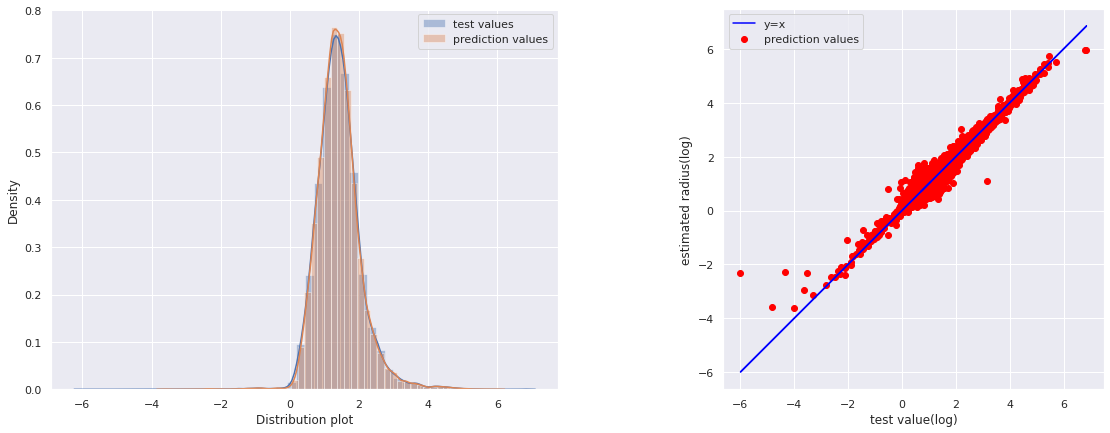

In [130]:
plot(Y_pred_forest)

### Linear Regression

In [131]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,Y_train)
Y_pred_LR = lr.predict(X_test)
r2_score_lr = r2_score_fun(Y_pred_LR)
mse_score_lr = MSE_fun(Y_pred_LR)
mae_score_lr = MAE_fun(Y_pred_LR)
print('The R^2 score achieved using Linear regression is:', r2_score_lr)
print('The mean square error achieved using Linear regression is:', mse_score_lr)
print('The mean absolute error achieved using Linear regression is:', mae_score_lr)
algorithms.append('LR')
r2_all.append(r2_score_lr)
MSE_all.append(mse_score_lr)
MAE_all.append(mae_score_lr)


The R^2 score achieved using Linear regression is: 0.5011691736056421
The mean square error achieved using Linear regression is: 62.960657226505084
The mean absolute error achieved using Linear regression is: 2.462617890547068


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


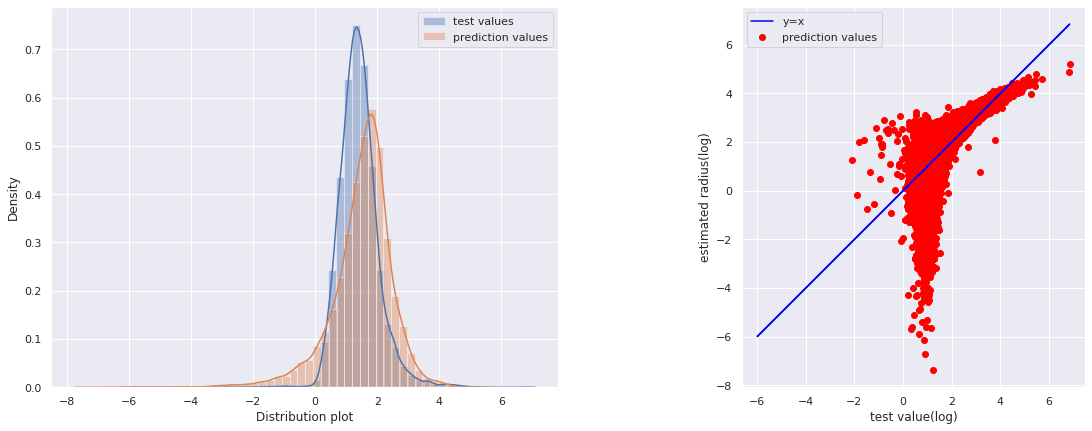

In [132]:
plot(Y_pred_LR)

### K-Nearest Neighbours (Regressor)

In [ ]:
# Calling gridsearch function for KNN Regressor
from sklearn.neighbors import KNeighborsRegressor
params = {
        'n_neighbors': [3,4,5]
    }

grid_model_knn = grid_search(KNeighborsRegressor(), params)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] END ......................................n_neighbors=3; total time= 4.1min
[CV] END ......................................n_neighbors=5; total time= 3.4min
Best Scores:  0.9198333239759885
Best estimator:  KNeighborsRegressor(n_neighbors=4)
Best parameters:  {'n_neighbors': 4}


**From Grid search we found that best hyperparameters for K-Nearest Neighbours are:<br>
n_neighbors = 4**

In [133]:
from sklearn.neighbors import KNeighborsRegressor

KNN_R = KNeighborsRegressor(n_neighbors=4)
KNN_R.fit(X_train,Y_train)
Y_pred_knr = KNN_R.predict(X_test)
r2_score_knn = r2_score_fun(Y_pred_knr)
mse_score_knn = MSE_fun(Y_pred_knr)
mae_score_knn = MAE_fun(Y_pred_knr)
print('The R^2 score achieved using KNN regression is:', r2_score_knn)
print('The mean square error achieved using KNN regression is:', mse_score_knn)
print('The mean absolute error achieved using KNN regression is:', mae_score_knn)

algorithms.append('k-NN')
r2_all.append(r2_score_knn)
MSE_all.append(mse_score_knn)
MAE_all.append(mae_score_knn)


The R^2 score achieved using KNN regression is: 0.7577471108753253
The mean square error achieved using KNN regression is: 30.576300235004265
The mean absolute error achieved using KNN regression is: 0.6521113501833896


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


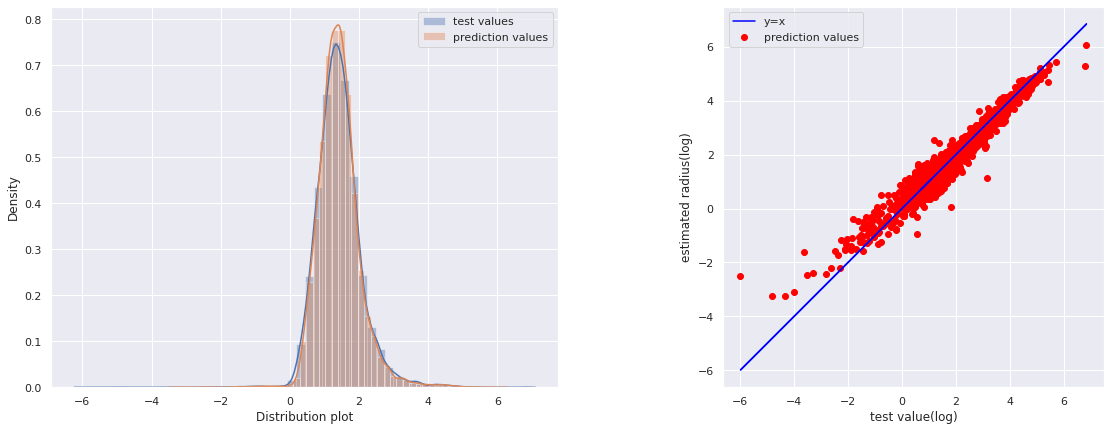

In [134]:
plot(Y_pred_knr)

### XGBoost

In [ ]:
!pip install xgboost

     |████████████████████████████████| 1.7 MB 6.2 MB/s eta 0:00:01


In [ ]:
# Calling gridsearch function for XGBoost
import xgboost as xgb
params = {
        'colsample_bytree': [0.2,0.3,0.4],
        'learning_rate': [0.04,0.08,0.12],
        'max_depth': [3,4,5],
        'n_estimators': [400,500,600]
    }

grid_model_xgboost = grid_search(xgb.XGBRegressor(), params)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END colsample_bytree=0.2, learning_rate=0.04, max_depth=3, n_estimators=400; total time=  12.6s
[CV] END colsample_bytree=0.2, learning_rate=0.04, max_depth=4, n_estimators=400; total time=  18.1s
[CV] END colsample_bytree=0.2, learning_rate=0.04, max_depth=4, n_estimators=600; total time=  29.7s
[CV] END colsample_bytree=0.2, learning_rate=0.08, max_depth=3, n_estimators=400; total time=  16.4s
[CV] END colsample_bytree=0.2, learning_rate=0.08, max_depth=3, n_estimators=500; total time=  21.0s


/Users/paritoshsabade/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END colsample_bytree=0.2, learning_rate=0.04, max_depth=3, n_estimators=600; total time=  19.0s
[CV] END colsample_bytree=0.2, learning_rate=0.04, max_depth=4, n_estimators=600; total time=  28.3s
[CV] END colsample_bytree=0.2, learning_rate=0.04, max_depth=5, n_estimators=500; total time=  32.9s
[CV] END colsample_bytree=0.2, learning_rate=0.08, max_depth=3, n_estimators=500; total time=  21.1s
[CV] END colsample_bytree=0.2, learning_rate=0.04, max_depth=3, n_estimators=500; total time=  15.8s
[CV] END colsample_bytree=0.2, learning_rate=0.04, max_depth=4, n_estimators=500; total time=  23.1s
[CV] END colsample_bytree=0.2, learning_rate=0.04, max_depth=5, n_estimators=500; total time=  32.0s
[CV] END colsample_bytree=0.2, learning_rate=0.08, max_depth=3, n_estimators=400; total time=  16.6s
[CV] END colsample_bytree=0.2, learning_rate=0.08, max_depth=3, n_estimators=600; total time=  25.3s
[CV] END colsample_bytree=0.2, learning_rate=0.04, max_depth=3, n_estimators=400; total tim

[CV] END colsample_bytree=0.3, learning_rate=0.04, max_depth=3, n_estimators=500; total time=  30.8s
[CV] END colsample_bytree=0.3, learning_rate=0.04, max_depth=4, n_estimators=500; total time=  41.7s
[CV] END colsample_bytree=0.3, learning_rate=0.04, max_depth=5, n_estimators=500; total time=  52.7s
[CV] END colsample_bytree=0.3, learning_rate=0.08, max_depth=3, n_estimators=400; total time=  25.5s
[CV] END colsample_bytree=0.3, learning_rate=0.08, max_depth=3, n_estimators=600; total time=  37.2s
[CV] END colsample_bytree=0.3, learning_rate=0.08, max_depth=4, n_estimators=600; total time=  49.3s
[CV] END colsample_bytree=0.3, learning_rate=0.04, max_depth=3, n_estimators=600; total time=  37.3s
[CV] END colsample_bytree=0.3, learning_rate=0.04, max_depth=4, n_estimators=600; total time=  49.8s
[CV] END colsample_bytree=0.3, learning_rate=0.04, max_depth=5, n_estimators=600; total time= 1.1min
[CV] END colsample_bytree=0.3, learning_rate=0.08, max_depth=4, n_estimators=400; total tim

[CV] END colsample_bytree=0.4, learning_rate=0.04, max_depth=3, n_estimators=400; total time=  33.8s
[CV] END colsample_bytree=0.4, learning_rate=0.04, max_depth=3, n_estimators=600; total time=  51.3s
[CV] END colsample_bytree=0.4, learning_rate=0.04, max_depth=4, n_estimators=600; total time= 1.2min
[CV] END colsample_bytree=0.4, learning_rate=0.04, max_depth=5, n_estimators=500; total time= 1.2min
[CV] END colsample_bytree=0.4, learning_rate=0.08, max_depth=3, n_estimators=600; total time=  53.8s
[CV] END colsample_bytree=0.4, learning_rate=0.08, max_depth=4, n_estimators=500; total time= 1.0min
[CV] END colsample_bytree=0.4, learning_rate=0.04, max_depth=4, n_estimators=500; total time=  58.2s
[CV] END colsample_bytree=0.4, learning_rate=0.04, max_depth=5, n_estimators=500; total time= 1.2min
[CV] END colsample_bytree=0.4, learning_rate=0.08, max_depth=3, n_estimators=400; total time=  35.9s
[CV] END colsample_bytree=0.4, learning_rate=0.08, max_depth=3, n_estimators=600; total tim

**From Grid search we found that best hyperparameters for XGBoost are:<br>
colsample_bytree = 0.4, <br>
learning_rate = 0.12, <br>
max_depth = 3, <br>
n_estimators = 600**

In [135]:
import xgboost as xgb
xgReg = xgb.XGBRegressor(objective ='reg:squarederror', 
                         colsample_bytree = 0.4, 
                         learning_rate = 0.12, 
                         max_depth = 3, 
                         n_estimators = 600)

xgReg.fit(X_train,Y_train)
Y_pred_xgb = xgReg.predict(X_test)
r2_score_xgb = r2_score_fun(Y_pred_xgb)
mse_score_xgb = MSE_fun(Y_pred_xgb)
mae_score_xgb = MAE_fun(Y_pred_xgb)
print('The R^2 score achieved using XGBoost is:', r2_score_xgb)
print('The mean square error achieved using XGBoost is:', mse_score_xgb)
print('The mean absolute error achieved using XGBoost is:', mae_score_xgb)

algorithms.append('XGB')
r2_all.append(r2_score_xgb)
MSE_all.append(mse_score_xgb)
MAE_all.append(mae_score_xgb)

The R^2 score achieved using XGBoost is: 0.8061057607747607
The mean square error achieved using XGBoost is: 24.47264300463116
The mean absolute error achieved using XGBoost is: 0.4930805896540485


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


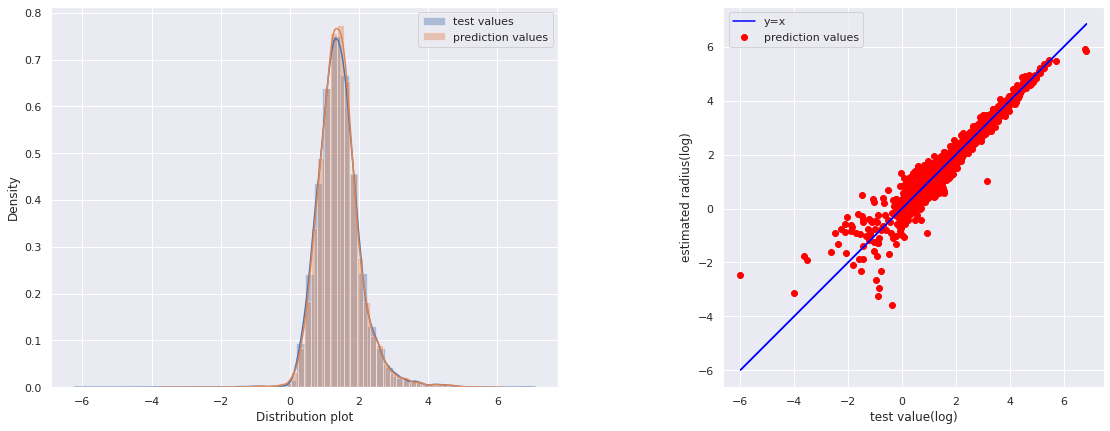

In [136]:
plot(Y_pred_xgb)

### Neural Network

In [137]:
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import adam_v2

In [138]:
# defining NN model
optimizer = adam_v2.Adam(learning_rate=0.001)
model = Sequential()
model.add(Dense(24,activation='tanh',input_dim=X_train.shape[1]))
model.add(Dense(12,activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error',optimizer=optimizer)

In [139]:
# Calling gridsearch function for Neural Net
from sklearn.model_selection import KFold
params = {
        'batch_size': [200,250,300,500],
        'learning_rate': [0.005,0.01,0.05,0.1],
        'epoch': [50,100,150]
    }

grid_model_nn = GridSearchCV(estimator=model, param_grid=params, n_jobs=-1, cv=KFold())


In [140]:
### Training
model.fit(X_train,Y_train,epochs=200,batch_size=256,verbose=False)
### Predicting
Y_pred_nn = model.predict(X_test)

r2_score_nn = r2_score_fun(Y_pred_nn)
mse_score_nn = MSE_fun(Y_pred_nn)
mae_score_nn = MAE_fun(Y_pred_nn)
print('The R^2 score achieved using NN is:', r2_score_nn)
print('The mean square error achieved using NN is:', mse_score_nn)
print('The mean absolute error achieved using NN is:', mae_score_nn)

algorithms.append('Neural Net')
r2_all.append(r2_score_nn)
MSE_all.append(mse_score_nn)
MAE_all.append(mae_score_nn)

The R^2 score achieved using NN is: 0.8683172656830221
The mean square error achieved using NN is: 16.620527560230894
The mean absolute error achieved using NN is: 0.44854646615526295


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


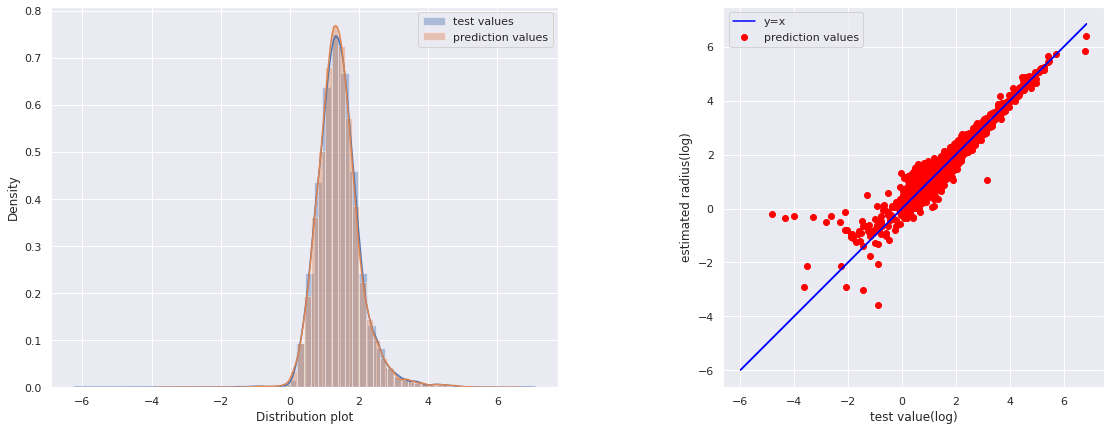

In [148]:
plot(Y_pred_nn)

### Comparing R<sup>2</sup> score of algorithms used

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


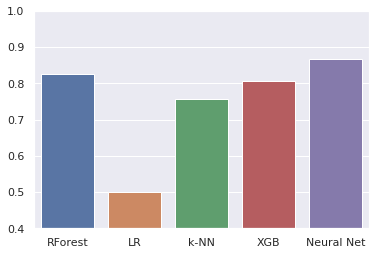

In [144]:
sns.barplot(algorithms,r2_all)
plt.ylim(0.4,1)
plt.show()

### Comparing  Mean Squared Error(MSE) of algorithms used

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


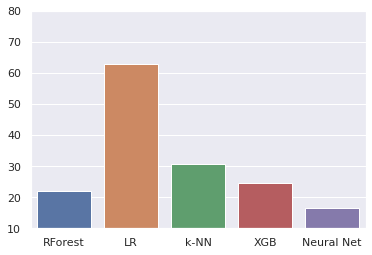

In [145]:
sns.barplot(algorithms,MSE_all)
plt.ylim(10,80)
plt.show()

### Comparing  Mean Absolute Error(MSE) of algorithms used

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


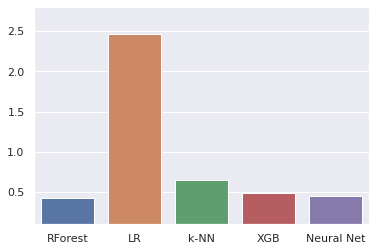

In [147]:
sns.barplot(algorithms,MAE_all)
plt.ylim(0.1,2.8)
plt.show()